<a href="https://colab.research.google.com/github/guilhermeaugusto9/sigmoidal/blob/master/04_8_Como_Avaliar_um_Modelo_de_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Como avaliar um modelo de *Machine Learning*

Beleza, você construiu seu modelo de *Machine Learning*, após várias horas fazendo uma análise exploratória e limpando os dados, treinou ele em cima do seu conjunto de dados e obteve os coeficientes "ideais". Qual o próximo passo?

> "Você não controla aquilo que não consegue mensurar"

Trabalhei durante 1 ano no Centro de Operações Aeroespaciais (COMAE), analisando dados da cadeia de Comando e Controle (C2) da Força Aérea, e essa foi uma das frases que eu mais escutei por lá.

<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/pngtree-measuring-accuracy-measure-small-tiny-flat-color-icon-vect-png-image_1619121.jpg" align=left width="200px">

Na verdade, medir resultados e monitorar indicadores não é algo exclusivo de sistemas militares, mas é uma tarefa obrigatória em qualquer atividade, ainda mais em modelos de Inteligência Artificial.

Se você não sabe como o seu algoritmo está performando, pode acabar compromentendo o faturamento de uma empresa ou até mesmo a imagem dela.

Existem inúmeras metodologias, métricas e pesquisas sobre esta etapa de avaliação. A cada dia, a fronteira da ciência avança um passo. O que era o *estado da arte* ontem, provavelmente não mais será em um mês. 

Quero trazer aqui uma visão geral daquelas métricas mais conhecidas e usadas pela comunidade. 


## Avaliando Modelos de Regressão

Modelos de Regressão buscam prever um valor numérico contínuo. Por exemplo, qual o preço de venda de um imóvel ou qual o faturamento esperado para o próximo mês.

Quando estamos usando o *dataset* de teste, fazemos a previsão $\hat{y}_i$ para a $i\text{-ésima}$ linha, uma vez que também temos o valor real $y_i$, podemos calcular esse erro de diferentes formas.

<center><img width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/regressao_loss.png"></center>

Na imagem acima, considere que a reta representa o seu modelo de regressão, ou seja, a própria previsão. Cada seta (vetor) representa a diferença entre o valor real e a previsão.

Em outras palavras, cada seta representa o quanto você errou naquela previsão específica. Se você medir todas as distâncias entre os pontos e a reta (que é o seu modelo), você vai ter o seu erro, ou ***loss***.

No exemplo dessa figura, fica bem claro que o modelo do plot da esquerda "erra" bem mais que o plot do modelo da direita. Ou seja, o modelo da direita é melhor.

Na verdade, existem diversas métricas que podem ser utilizadas para verificar o desempenho do seu modelo. Vamos dar uma olhadas nas principais.

### *Mean Absolut Error* - MAE

É o mais simples de todos, onde se calcula a média da magnitude do erro para todos os pontos onde realizamos previsões, sem considerar a direção. 

$$MAE = \frac{1}{m}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

É a mais intuitiva de todas as métricas, pois olhamos a diferença absoluta entre a previsão e o real.

O problema com o MAE é que todos os erros individuais são tratados da mesma maneira, o que pode ser um problema para lidar com outliers.

### *Mean Squared Error* - MSE

O MSE calcula a média dos erros elevados à segunda potência.

$$MSE = \frac{1}{m}\sum_{i=1}^{m}(y_i - \hat{y}_i)^2$$

A vantagem é que os erros mais grotescos serão mais penalizados que aqueles menores, o que implica que diferenças menores terão menos impacto na avaliação. 

Pode haver uma dificuldade na sua interpretação, uma vez que a unidade de medida será alterara.

### *Root Mean Squared Error* - RMSE

Calcular a raiz quadrada da média dos quadrados dos erros faz com que a RMSE penalize os maiores erros, sendo mais sensível aos outliers.

$$RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(y_i - \hat{y}_i)^2}$$

Note que as diferenças são elevadas ao quadrado antes que sua média seja calculada.

Essa métrica é muito desejada em situações onde desejamos que grandes erros sejam evitados ao máximo.

### *R-Squared* - $R^2$

Apesar do R-Squared não se tratar de *erros*, propriamente, é bastante popular para verificar a acurácia de modelos de regressão.

$$R^2 = 1 - \frac{\sum_{j=1}^{m}(y_i - \hat{y}_i)^2}{\sum_{j=1}^{m}(y_i - \bar{y}_i)^2}$$

Você pode entender a métrica como sendo "quão bom o seu modelo está próximo dos valores reais", e ele faz isso calculando as variâncias em relação à media e à reta.


## Avaliando Modelos de Classificação

Como se avalia um modelo de classificação?

Seja trabalhando com classificação binária ou com diversas classes, as métricas relacionadas a modelos de classificação não podem ser os mesmos que usamos em modelos de regressão.


### Acurácia

Definitivamente, é a métrica mais intuitiva e fácil para se entender. A acurácia mostra diretamente a porcentagem de acertos do nosso modelo.

$$
\text{Acurácia} = \frac{\text{Número de previsões corretas}}{\text{Número total de previsões}}
$$

Apesar de ser muito direta e intuitiva, a acurácia não é uma boa métrica quando você lida, por exemplo, com dados desbalanceados.

Em um *dataset* de fraudes bancárias, o número de eventos classificados como fraude pode ser inferior a 1%. Ou seja, a acurácia do modelo será superior para os casos de não-fraude e não retratará bem a natureza do nosso problema.

Nesse exemplo de fraude bancária, o banco irá preferir uma acurácia máxima na detecção de casos confirmados de fraudes, mesmo que tenha diminuir a acurácia global - e ter um número maior de alarmes falsos.

Veja um exemplo do curso Machine Learning Crash Course do Google. Nele, pode-se ver com que olhar simplesmente a acurácia pode levar a conclusões erradas. Abaixo, estamos olhando os resultados de um modelo para detecção de tumores malignos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/acuracia.png"></center>

Uma acurácia de 91% pode levar a uma interpretação equivocada, pois o modelo conseguiu detectar corretamente apenas 1 dos 9 tumores malignos. Para casos como esses, de dados desbalanceados, o ideal é separar os erros em diferentes tipos, e não apenas usar uma métrica global de acurácia.

**Tipos de erros**

* **Verdadeiro positivo (*true positive* — TP):** Por exemplo, quando o paciente tem tumor maligno e o modelo classifica como tendo tumor maligno.

* **Falso positivo (*false positive* — FP):** Por exemplo, quando o paciente não tem tumor maligno e o modelo classifica como tendo tumor maligno.

* **Falso negativo (*true negative* — TN)**: Por exemplo, quando o paciente tem tumor maligno e o modelo classifica como não tendo tumor maligno.

* **Verdadeiro negativo (*false negative* — FN):** Por exemplo, quando o paciente não tem tumor maligno e o modelo classifica como não tendo tumor maligno.

Com esses conceitos, vamos dar uma olhada em duas outras métricas.

### Precision

A precisão diz respeito à quantidade (proporcional) de identificações positivas feita corretamente, e é obtida pela equação 

$$
\frac{TP}{TP+FP}
$$

Ela responde **"qual a proporção de identificações positivas que estava correta?"** Esse valor será máximo (1.0) quando não produzir falsos negativos. 

No exemplo do tumor maligno, a precisão seria 50%, o que significa que quando o modelo prevê um tumor maligno, está correto metado das vezes.

### *Recall*

Mostra a proporção de positivos encontrados corretamente. Matematicamente, você calcular o *recall* da seguinte maneira:

$$
\frac{TP}{TP+FN}
$$

No caso do tumor maligno, o recall teria um valor igual a 11%, o que significa que o modelo é capaz de prever corretamente apenas 11% de todos os tumores malignos.

### *F1-score*

É a média harmonica entre precisão e *recall*. O melhor valor possível para 0 *F1-score* é 1 e o pior é 0. É calculado por 

$$
2* \frac{precision*recall}{precision+recall}
$$

### Matriz de Confusão

Uma das principais maneiras de você verificar o desempenho do seu algoritmo é por meio da Matriz de Confusão. Para cada classe, ela informa quais os valores reais (*actual*) e os valores previstos pelo modelo (*predicted*).

Dessa maneira, é possível rapidamente identificar:

<p align=center><img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Screen-Shot-2019-10-07-at-10.02.40.png" width="80%"></p>


Desse sumário da matriz de confusão, conseguimos extrair várias informações importantes.

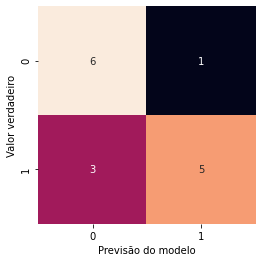

In [ ]:
# problema binário de classificação
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_true = [0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]

mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor verdadeiro');

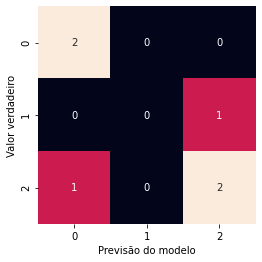

In [ ]:
# problema de classificação com múltiplas classes
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]

mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor verdadeiro');

In [ ]:
# exemplo do classification Report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         ant       0.67      1.00      0.80         2
        bird       0.00      0.00      0.00         1
         cat       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
